In [62]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

In [63]:
DIR_QUERIES = '../data/query-stats'
DIR_QUERIES_1 = f'{DIR_QUERIES}/1'
DIR_QUERIES_3 = f'{DIR_QUERIES}/3'
DIR_QUERIES_6 = f'{DIR_QUERIES}/6'
DIR_QUERIES_12 = f'{DIR_QUERIES}/12'
FILE_COMBINED_3 = f'{DIR_QUERIES}/3.csv'

In [64]:
range_days = {
    # "FALSE": 0,
    "d_date = cast('2000-04-30' as date)": 1,
    # "d_date between cast('2000-04-30' as date) and ((cast('2000-04-30' as date) + interval '2' day))": 2,
    # "d_date between cast('2000-04-30' as date) and ((cast('2000-04-30' as date) + interval '4' day))": 4,
    "d_date between cast('2000-04-30' as date) and ((cast('2000-04-30' as date) + interval '1' week))": 7,
    # "d_date between cast('2000-04-30' as date) and ((cast('2000-04-30' as date) + interval '10' day))": 10,
    "d_date between cast('2000-04-30' as date) and ((cast('2000-04-30' as date) + interval '2' week))": 14,
    "d_year = 2000 and d_moy = 1": 31,
    "d_year = 2000 and d_moy between 1 and 2": 60,
    "d_year = 2000 and d_moy between 1 and 3": 91,
    "d_year = 2000 and d_moy between 1 and 4": 121,
    "d_year = 2000 and d_moy between 1 and 5": 152,
    "d_year = 2000 and d_moy between 1 and 6": 182,
    "d_year = 2000 and d_moy between 1 and 7": 213,
    "d_year = 2000 and d_moy between 1 and 8": 244,
    "d_year = 2000 and d_moy between 1 and 9": 274,
    "d_year = 2000 and d_moy between 1 and 10": 305,
    "d_year = 2000 and d_moy between 1 and 11": 335,
    "d_year = 2000": 366,
    "d_year = 1999 or d_year = 2000": 731, 
}


In [65]:
def get_combined_stats(dir):
    file_list = os.listdir(dir)

    df = pd.DataFrame()

    for file_name in file_list:
        if file_name.endswith('.csv'):
            df_query = pd.read_csv(f'{dir}/{file_name}')
            df_query['query'] = file_name.strip('.csv')
            df = pd.concat([df, df_query], ignore_index=True)

    return df.sort_values(['query', 'time'])

In [66]:
def save_combined_stats(queries, path):
    query_times = queries[(queries['rows'] > 0) & (queries['range'] != 'FALSE')].groupby(['query', 'range']).agg({'time': ['mean', 'min', 'max'], 'rows': 'median'})
    query_times.columns = [c[0] + "_" + c[1] for c in query_times.columns]
    query_times = query_times.rename(columns={'rows_median': 'rows', 'time_mean': 'duration', 'time_min': 'min_duration', 'time_max': 'max_duration'})
    query_times['rows'] = query_times['rows'].astype(int)
    
    query_times.to_csv(path)


In [67]:
queries_1 = get_combined_stats(DIR_QUERIES_1)
queries_3 = get_combined_stats(DIR_QUERIES_3)
queries_6 = get_combined_stats(DIR_QUERIES_6)
queries_12 = get_combined_stats(DIR_QUERIES_12)

In [68]:
display(queries_1)
display(queries_3)
display(queries_6)
display(queries_12)

,range,time,rows,query
727,FALSE,304,0,q1
729,FALSE,311,0,q1
726,FALSE,348,0,q1
724,FALSE,354,0,q1
728,FALSE,355,0,q1
...,...,...,...,...
532,d_year = 2000 or d_year = 2001,89290,150000,q7
537,d_year = 2000 or d_year = 2001,90671,150000,q7
536,d_year = 2000 or d_year = 2001,90836,150000,q7
534,d_year = 2000 or d_year = 2001,91658,150000,q7


,range,time,rows,query
958,FALSE,407,0,q1
956,FALSE,517,0,q1
955,FALSE,544,0,q1
952,FALSE,560,0,q1
954,FALSE,562,0,q1
...,...,...,...,...
556,d_year = 2000 or d_year = 2001,38078,100,q7
554,d_year = 2000 or d_year = 2001,38277,100,q7
553,d_year = 2000 or d_year = 2001,38290,100,q7
559,d_year = 2000 or d_year = 2001,38681,100,q7


,range,time,rows,query
724,FALSE,345,0,q1
726,FALSE,387,0,q1
727,FALSE,390,0,q1
725,FALSE,397,0,q1
729,FALSE,419,0,q1
...,...,...,...,...
538,d_year = 2000 or d_year = 2001,23630,150000,q7
536,d_year = 2000 or d_year = 2001,23642,150000,q7
535,d_year = 2000 or d_year = 2001,23680,150000,q7
539,d_year = 2000 or d_year = 2001,23685,150000,q7


,range,time,rows,query
728,FALSE,371,0,q1
729,FALSE,421,0,q1
725,FALSE,440,0,q1
727,FALSE,1454,0,q1
724,FALSE,1482,0,q1
...,...,...,...,...
539,d_year = 2000 or d_year = 2001,15116,150000,q7
538,d_year = 2000 or d_year = 2001,15252,150000,q7
530,d_year = 2000 or d_year = 2001,15362,150000,q7
533,d_year = 2000 or d_year = 2001,15499,150000,q7


In [69]:
save_combined_stats(queries_3, FILE_COMBINED_3)

In [70]:
def get_mapped_df(queries):
    df = queries[queries['range'].isin(range_days.keys())].copy()
    df['time_s'] = df['time'] / 1000
    df['range_days'] = df['range'].map(range_days)
    return df

def add_plot(ax, queries, query_name, label, scatter=True, boxplot=False):

    queries = queries[queries['query'] == query_name]

    x = queries['range_days']
    y = queries['time_s']

    if scatter:
        ax.scatter(x, y, alpha=0.25, s=10, label=label)

    if boxplot:
        grouped = queries.groupby(['range_days', 'query'])
        boxplot_data = []
        positions=[]

        for group, data in grouped:
            positions.append(data['range_days'].min())
            boxplot_data.append(data['time_s'])
        
        if len(positions) > 0:
            ax.boxplot(boxplot_data, positions=positions, widths=5)
        

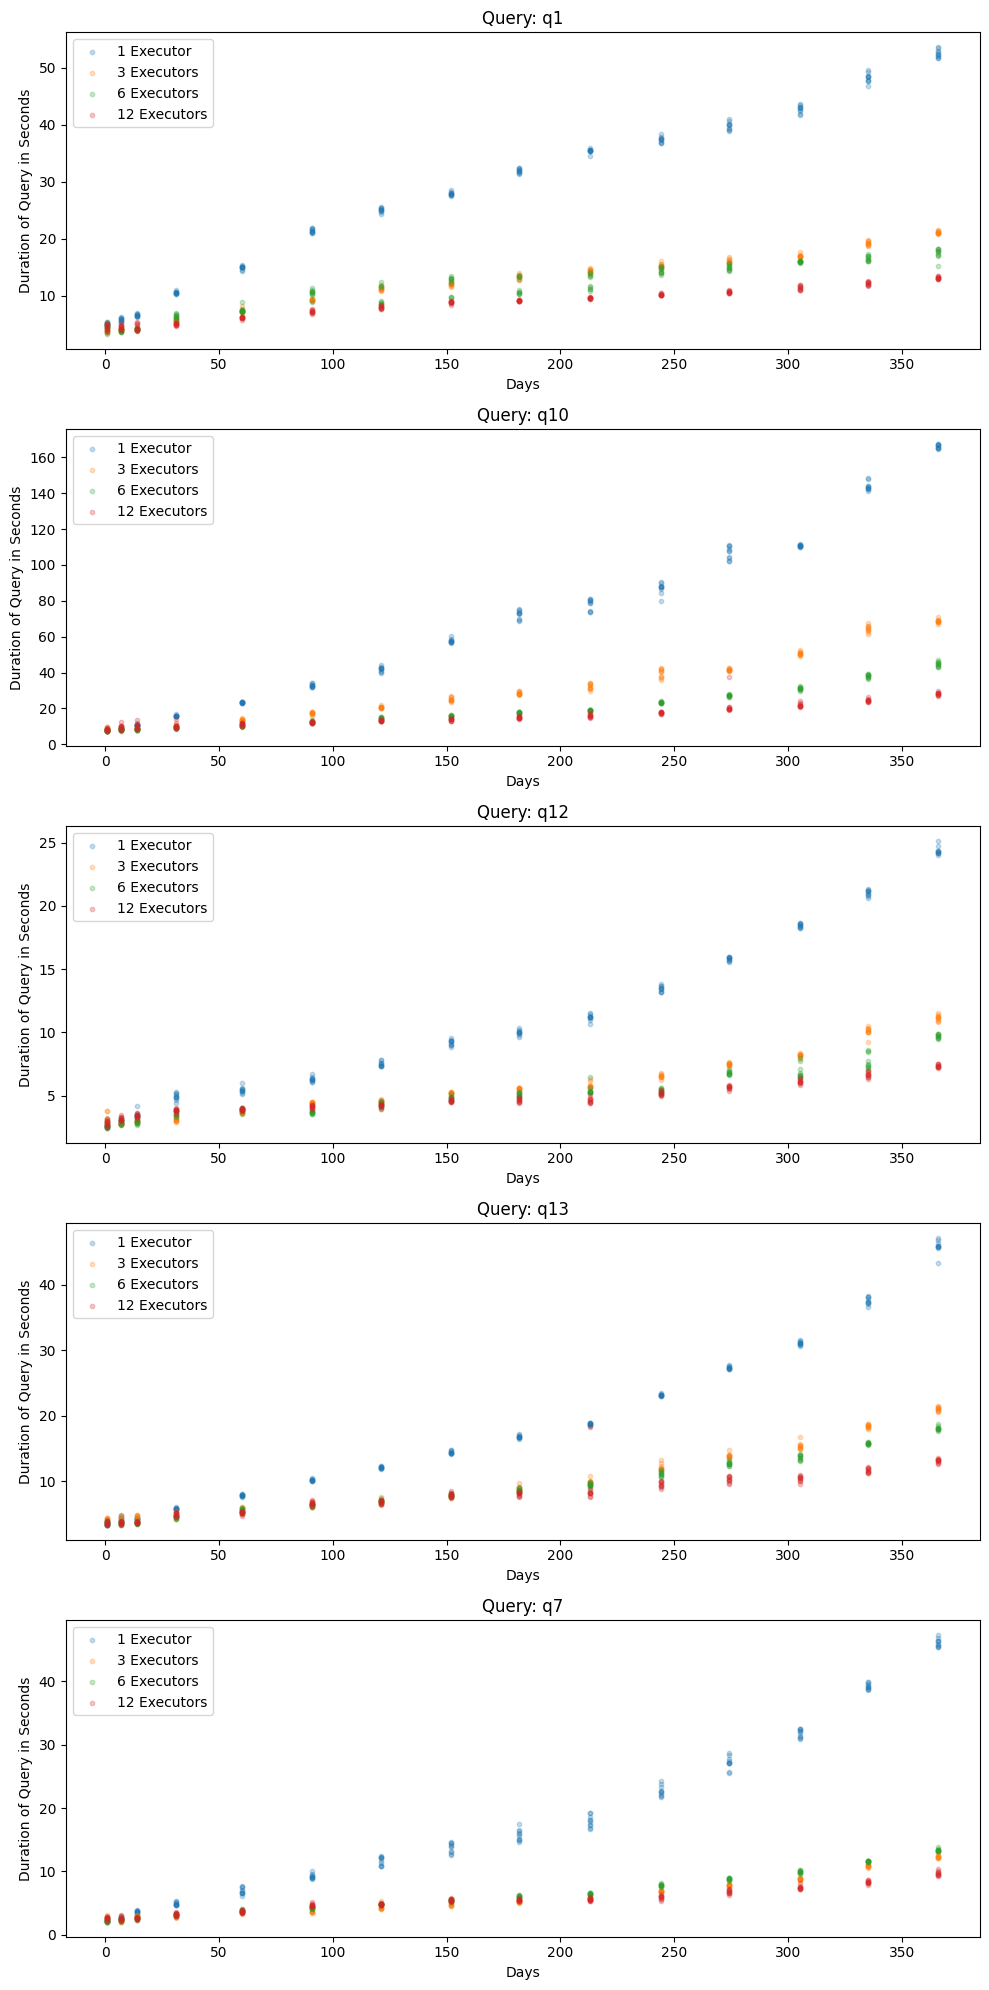

In [71]:
queries_1_mapped = get_mapped_df(queries_1)
queries_3_mapped = get_mapped_df(queries_3)
queries_6_mapped = get_mapped_df(queries_6)
queries_12_mapped = get_mapped_df(queries_12)

query_names = queries_3_mapped['query'].unique()

# Create subplots
fig, axs = plt.subplots(len(query_names), 1, figsize=(10, len(query_names) * 4))

# Iterate over queries
for i, query in enumerate(query_names):

    add_plot(axs[i], queries_1_mapped, query, '1 Executor', scatter=True)
    add_plot(axs[i], queries_3_mapped, query, '3 Executors', scatter=True)
    add_plot(axs[i], queries_6_mapped, query, '6 Executors', scatter=True)
    add_plot(axs[i], queries_12_mapped, query, '12 Executors', scatter=True)
    axs[i].legend()
    # print(f"R-squared value: {r2}")
    axs[i].set_xlabel('Days')
    axs[i].set_ylabel('Duration of Query in Seconds')
    axs[i].set_title(f'Query: {query}')
    # axs[i].legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

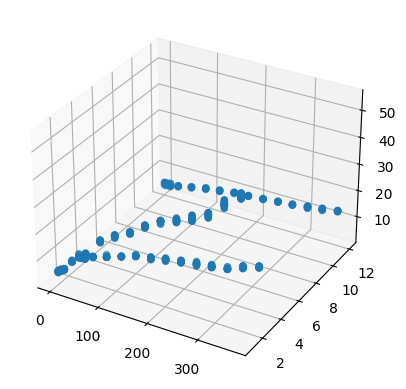

In [50]:
query_names = queries_3_mapped['query'].unique()

# Create subplots
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

queries = queries_3_mapped[queries_3_mapped['query'] == 'q1'].copy()
queries12 = queries_12_mapped[queries_12_mapped['query'] == 'q1'].copy()
queries12['executors'] = 12
queries1 = queries_1_mapped[queries_1_mapped['query'] == 'q1'].copy()
queries1['executors'] = 1
queries['executors'] = 3

queries = pd.concat([queries, queries12, queries1])

x = queries['range_days']
z = queries['time_s']
y = queries['executors']

ax.scatter(x, y , z)

# # Iterate over queries
# for i, query in enumerate(query_names):
#     add_plot(axs[i], queries_1_mapped, query, '1 Executor', scatter=True)
#     add_plot(axs[i], queries_3_mapped, query, '3 Executors', scatter=True)
#     # add_plot(axs[i], queries_6_mapped, query, '6 Executors', scatter=True)
#     add_plot(axs[i], queries_12_mapped, query, '12 Executors', scatter=True)
#     axs[i].legend()
#     # print(f"R-squared value: {r2}")
#     axs[i].set_xlabel('Days')
#     axs[i].set_ylabel('Duration of Query in Seconds')
#     axs[i].set_title(f'Query: {query}')
#     # axs[i].legend()

# # Adjust the layout
# plt.tight_layout()

# Show the plot
plt.show()